### RNN (Recurent Neural Network) - LSTM (Long Short Term Memory) - GRU (Gated Recurent Unit)

#### RNN

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generate example data
X = np.random.rand(100, 10, 1)
y = np.random.randint(0, 2, size=(100,))

In [3]:
X.shape, y.shape

((100, 10, 1), (100,))

In [4]:
# Define the model
model = Sequential([
    SimpleRNN(32, input_shape=(10, 1)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)



Epoch 1/10


4/4 [==============================] - 4s 9ms/step - loss: 0.7040 - accuracy: 0.4800
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.4300
Epoch 3/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6898 - accuracy: 0.4700
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6852 - accuracy: 0.4800
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6825 - accuracy: 0.5700
Epoch 6/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6830 - accuracy: 0.6000
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6803 - accuracy: 0.6400
Epoch 8/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6761 - accuracy: 0.6000
Epoch 9/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6731 - accuracy: 0.5500
Epoch 10/10
4/4 [==============================] - 1s 7ms/step - loss: 0.6729 - accuracy: 0.5100
Test Loss: 0.6728559732437134
Tes

### LSTM (Long Short Term Memory) is a special kind of RNN, capable of learning long-term dependencies.

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))
df.head()

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Epoch 1/100
4/4 [==============================] - 6s 11ms/step - loss: 0.6239
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.5165
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.4255
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.3350
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.2711
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.2107
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1834
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1712
Epoch 9/100
4/4 [==============================] - 0s 22ms/step - loss: 0.1705
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1676
Epoch 11/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1650
Epoch 12/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1628
Epoch 13/100
4/4 [==============================]

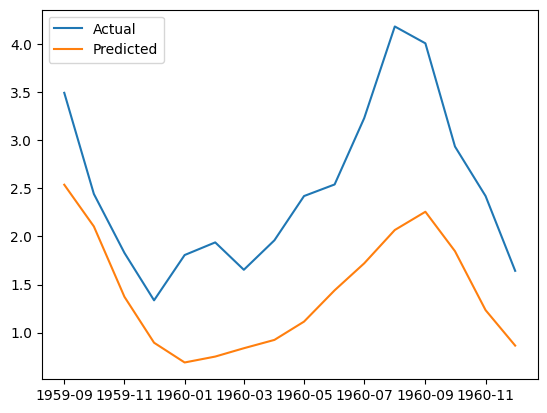

In [6]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential([
    LSTM(32, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()

### let's build a simple RNN-based character-level text generator using a sample text. We'll use a sequence-to-sequence prediction approach to predict the next character in a sequence.

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample text data
text = "hello world! this is a simple text example for rnn."
chars = sorted(list(set(text))) # Get unique characters
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars)) # Normalize
y = tf.keras.utils.to_categorical(y)

# Define model
model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2])),
    Dense(len(chars), activation='softmax')
])

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Predict a sequence
start = np.random.randint(0, len(X)-1)
pattern = X[start]
print("Seed:")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")

for i in range(50): # Generate 50 characters
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=1)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))] for value in pattern]
    print(result, end="")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]

print("\n")

Epoch 1/100
5/5 [==============================] - 6s 14ms/step - loss: 2.9475
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 2.9189
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 2.8940
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 2.8686
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 2.8143
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 2.7810
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 2.7508
Epoch 8/100
5/5 [==============================] - 0s 11ms/step - loss: 2.7492
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 2.7348
Epoch 10/100
5/5 [==============================] - 0s 16ms/step - loss: 2.7364
Epoch 11/100
5/5 [==============================] - 0s 18ms/step - loss: 2.7388
Epoch 12/100
5/5 [==============================] - 0s 14ms/step - loss: 2.7354
Epoch 13/100
5/5 [==============================] 

Here, we first convert our sample text into sequences of characters. Each sequence of characters (X) corresponds to a next character (y). The model is trained to predict y from X.

After training, we take a random seed sequence and use the model to predict the next 50 characters. The output will show the initial seed and the generated text based on it.

Epoch 1/100
4/4 [==============================] - 4s 11ms/step - loss: 0.5668
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4407
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.3433
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2666
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.2087
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 0.1743
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1599
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1534
Epoch 9/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1551
Epoch 10/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1572
Epoch 11/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1546
Epoch 12/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1503
Epoch 13/100
4/4 [==============================]

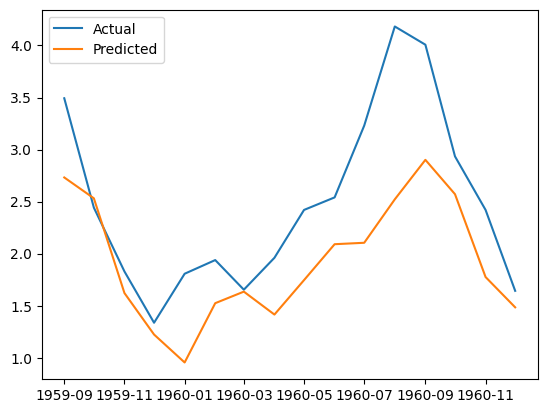

In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU  # Note the change here
from tensorflow.keras.models import Sequential

# Load flight data
flights = sns.load_dataset('flights')

# Convert data to time series
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model using GRU
model = Sequential([
    GRU(32, input_shape=(seq_length, 1)),  # Note the change here
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()

### GRU on Text

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense  # Import GRU instead of LSTM

# Sample text data
text = "hello world! this is a simple text example for rnn."
chars = sorted(list(set(text)))  # Get unique characters
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars))  # Normalize
y = tf.keras.utils.to_categorical(y)

# Define model using GRU
model = Sequential([
    GRU(128, input_shape=(X.shape[1], X.shape[2])),  # Change LSTM to GRU here
    Dense(len(chars), activation='softmax')
])

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Predict a sequence
start = np.random.randint(0, len(X)-1)
pattern = X[start]
print("Seed:")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")

for i in range(50):  # Generate 50 characters
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))] for value in pattern]
    print(result, end="")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]

print("\n")

Epoch 1/100
5/5 [==============================] - 7s 12ms/step - loss: 2.9416
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 2.9079
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 2.8763
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 2.8490
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 2.8220
Epoch 6/100
5/5 [==============================] - 0s 64ms/step - loss: 2.7894
Epoch 7/100
5/5 [==============================] - 0s 18ms/step - loss: 2.7636
Epoch 8/100
5/5 [==============================] - 0s 16ms/step - loss: 2.7354
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 2.7810
Epoch 10/100
5/5 [==============================] - 0s 10ms/step - loss: 2.7315
Epoch 11/100
5/5 [==============================] - 0s 11ms/step - loss: 2.7232
Epoch 12/100
5/5 [==============================] - 0s 12ms/step - loss: 2.7230
Epoch 13/100
5/5 [==============================]